In [3]:
import os
import matplotlib.pyplot as plt
import cv2

In [5]:
img = cv2.imread("C:\\Users\\Braden\\Projects\\Door Finder\\floor_plans_500_yolov8\\test\\images\\668_png.rf.32c8cf5473952cea354b6fc9007aec5b.jpg")

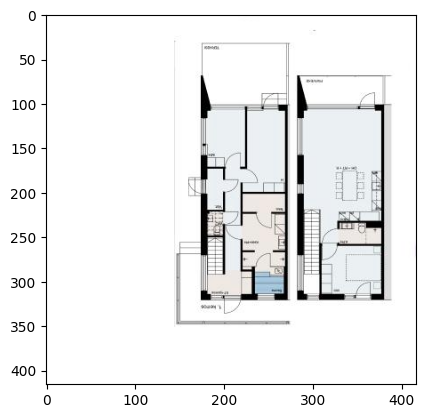

In [6]:
plt.imshow(img)

In [68]:
annotations_file = open("./floor_plans_500_yolov8/test/labels/668_png.rf.32c8cf5473952cea354b6fc9007aec5b.txt")
annotations = annotations_file.read()

In [69]:
annotations

'2 0.5360576923076923 0.15865384615384615 0.23197115384615385 0.16105769230769232\n2 0.484375 0.33533653846153844 0.11057692307692307 0.15745192307692307\n2 0.5949519230769231 0.36658653846153844 0.10697115384615384 0.22115384615384615\n2 0.4807692307692308 0.5060096153846154 0.09975961538461539 0.17307692307692307\n2 0.5877403846153846 0.5084134615384616 0.1141826923076923 0.054086538461538464\n2 0.5853365384615384 0.5889423076923077 0.1141826923076923 0.0985576923076923\n2 0.5889423076923077 0.6670673076923077 0.11177884615384616 0.04567307692307692\n2 0.6057692307692307 0.7235576923076923 0.08173076923076923 0.0625\n2 0.4987980769230769 0.6802884615384616 0.12139423076923077 0.15504807692307693\n2 0.8185096153846154 0.6875 0.15985576923076922 0.14182692307692307\n2 0.8497596153846154 0.5949519230769231 0.11658653846153846 0.055288461538461536\n2 0.7175480769230769 0.6418269230769231 0.04807692307692308 0.22716346153846154\n2 0.8040865384615384 0.4362980769230769 0.21514423076923078 

In [62]:
import pandas as pd
import io

In [91]:
def filter_for_doors(labels: pd.DataFrame ) -> pd.DataFrame: 
    filtered_df = labels[labels.iloc[:, 0] == 0]
    filtered_df_reset = filtered_df.reset_index(drop=True)
    return filtered_df_reset

In [72]:
df = pd.read_csv(io.StringIO(annotations), sep=' ', header=None)
print(df)

# Filter rows that start with 0 (first column equals 0)
filtered_df = df[df.iloc[:, 0] == 0]

# Display filtered DataFrame
print("Filtered DataFrame (rows starting with 0):")
print(f"Shape: {filtered_df.shape}")
print(filtered_df)

# Optional: Reset index if needed
filtered_df_reset = filtered_df.reset_index(drop=True)
print(f"\nFiltered DataFrame with reset index:")
print(filtered_df_reset)

    0         1         2         3         4
0   2  0.536058  0.158654  0.231971  0.161058
1   2  0.484375  0.335337  0.110577  0.157452
2   2  0.594952  0.366587  0.106971  0.221154
3   2  0.480769  0.506010  0.099760  0.173077
4   2  0.587740  0.508413  0.114183  0.054087
5   2  0.585337  0.588942  0.114183  0.098558
6   2  0.588942  0.667067  0.111779  0.045673
7   2  0.605769  0.723558  0.081731  0.062500
8   2  0.498798  0.680288  0.121394  0.155048
9   2  0.818510  0.687500  0.159856  0.141827
10  2  0.849760  0.594952  0.116587  0.055288
11  2  0.717548  0.641827  0.048077  0.227163
12  2  0.804087  0.436298  0.215144  0.354567
13  1  0.515625  0.251202  0.141827  0.020433
14  1  0.776442  0.252404  0.143029  0.024038
15  1  0.686298  0.331731  0.021635  0.105769
16  1  0.687500  0.475962  0.020433  0.027644
17  1  0.689904  0.697115  0.021635  0.100962
18  1  0.722356  0.764423  0.034856  0.018029
19  1  0.818510  0.763221  0.030048  0.016827
20  1  0.596154  0.765625  0.04927

In [83]:
def visualize_yolov8_annotations(image_path, annotation_path):
    """
    Visualizes YOLOv8 annotations (bounding boxes) on an image.
    Assumes annotation format: class_id center_x center_y width height (normalized)
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    height, width, _ = image.shape

    with open(annotation_path, 'r') as f:
        annotations = f.readlines()

    for ann in annotations:
        parts = list(map(float, ann.strip().split()))
        class_id = int(parts[0])
        center_x, center_y, bbox_width, bbox_height = parts[1:]

        # Convert normalized coordinates to pixel coordinates
        x1 = int((center_x - bbox_width / 2) * width)
        y1 = int((center_y - bbox_height / 2) * height)
        x2 = int((center_x + bbox_width / 2) * width)
        y2 = int((center_y + bbox_height / 2) * height)

        # pick color based on class_id 
        if class_id == 0: 
            color = (255,0,0)
        elif class_id == 1: 
#             continue
            color = (0,255,0)
        elif class_id == 1: 
#             continue
            color = (0,0,255)
        else:
#             continue
            color = (0,0,0)
        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2) # Green rectangle, 2px thick
        
        # Optionally add class label (requires a class_names list)
        # cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(image)

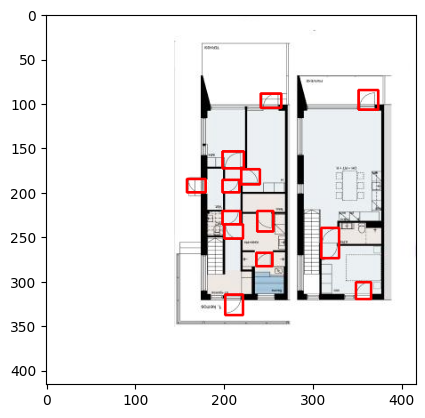

In [84]:
visualize_yolov8_annotations("./doors_500_yolov8/test/images/668_png.rf.32c8cf5473952cea354b6fc9007aec5b.jpg", "./doors_500_yolov8/test/labels/668_png.rf.32c8cf5473952cea354b6fc9007aec5b.txt")

In [93]:
root_path = "./doors_500_yolov8/"

for split in os.listdir(root_path): 
    split_label_dir = os.path.join(root_path, split) + '/labels'
#     print(root_path + split)
#     print(split_label_dir)
    if os.path.isdir(split_label_dir):
#         print(split_label_dir)
        for label in os.listdir(split_label_dir):
            label_path = os.path.join(split_label_dir, label)
            if os.path.isfile(label_path):
                print(label_path)
                annotations_file = open(label_path)
                annotations = annotations_file.read()
                labels_df = pd.read_csv(io.StringIO(annotations), sep=' ', header=None)
                labels_df = filter_for_doors(labels_df)
                print(labels_df)
                labels_df.to_csv(label_path, sep=' ', header=False, index=False)

./doors_500_yolov8/test/labels\1009_png.rf.db056ab1730e3d3766ec35197828e7b6.txt
   0         1         2         3         4
0  0  0.801683  0.210337  0.266827  0.265625
1  0  0.799279  0.481971  0.265625  0.258413
2  0  0.868990  0.694712  0.133413  0.141827
3  0  0.718750  0.718750  0.102163  0.091346
4  0  0.800481  0.829327  0.263221  0.114183
5  0  0.606971  0.162260  0.112981  0.173077
6  0  0.385817  0.474760  0.552885  0.818510
./doors_500_yolov8/test/labels\1010_png.rf.f3144e9371bda58a61e519283d2cf993.txt
   0         1         2         3         4
0  0  0.497596  0.483173  0.724760  0.837740
1  0  0.841346  0.234375  0.221154  0.342548
./doors_500_yolov8/test/labels\1012_png.rf.94b1b40f8d6d09a7131d39cc7a765fe1.txt
   0         1         2         3         4
0  0  0.495192  0.465144  0.768029  0.742788
1  0  0.240385  0.218750  0.287260  0.260817
2  0  0.320913  0.772837  0.449519  0.123798
./doors_500_yolov8/test/labels\1032_png.rf.179e80f6620aef8dfa24d6a53f18e8da.txt
   0 

./doors_500_yolov8/train/labels\1019_png.rf.2b2bab44b5b71d5ac7ed8262be92c35b.txt
    0         1         2         3         4
0   0  0.769231  0.108173  0.197716  0.129808
1   0  0.324519  0.322115  0.173077  0.260216
2   0  0.165865  0.366587  0.192909  0.362680
3   0  0.134615  0.592548  0.100962  0.112380
4   0  0.186298  0.715144  0.210036  0.258113
5   0  0.326923  0.774038  0.100361  0.135517
6   0  0.403846  0.752404  0.096154  0.178786
7   0  0.326923  0.323317  0.193510  0.280349
8   0  0.549279  0.544471  0.650841  0.747897
9   0  0.768029  0.731971  0.205228  0.229267
10  0  0.724760  0.568510  0.137019  0.201923
11  0  0.813702  0.545673  0.103966  0.153546
12  0  0.396635  0.917067  0.245192  0.165865
13  0  0.213942  0.569712  0.071214  0.058293
./doors_500_yolov8/train/labels\1019_png.rf.544ecd5aa296cb453498e827be1d14cb.txt
    0         1         2         3         4
0   0  0.770433  0.112981  0.206731  0.149639
1   0  0.325721  0.326923  0.187500  0.268029
2   0  0.1

./doors_500_yolov8/train/labels\1064_png.rf.cb85b21bdd939a4ce0be8d5bdeed1b11.txt
    0         1         2         3         4
0   0  0.277644  0.133413  0.065505  0.089243
1   0  0.198317  0.225962  0.060096  0.120192
2   0  0.381010  0.447115  0.054688  0.086238
3   0  0.381010  0.598558  0.055889  0.092548
4   0  0.378606  0.769231  0.062500  0.106070
5   0  0.379808  0.920673  0.062500  0.110577
6   0  0.584135  0.516827  0.057993  0.085637
7   0  0.638221  0.604567  0.059796  0.088942
8   0  0.753606  0.606971  0.062500  0.100962
9   0  0.829327  0.533654  0.061899  0.096154
10  0  0.829327  0.236779  0.062500  0.107272
11  0  0.816106  0.699519  0.043269  0.080829
./doors_500_yolov8/train/labels\1066_png.rf.2fb1e138b9a9da54a43b36a004b9dff4.txt
   0         1         2         3         4
0  0  0.430288  0.676683  0.102163  0.088341
1  0  0.605769  0.635817  0.096755  0.128005
2  0  0.331731  0.421875  0.096154  0.068810
3  0  0.450721  0.268029  0.094351  0.079026
4  0  0.555288 

./doors_500_yolov8/train/labels\1103_png.rf.aa0961e4a133162cc0b18aa36cd59348.txt
   0         1         2         3         4
0  0  0.361779  0.479567  0.079627  0.110577
1  0  0.271635  0.478365  0.066406  0.096755
2  0  0.804087  0.406250  0.092849  0.102163
3  0  0.882212  0.408654  0.082332  0.097055
4  0  0.444712  0.584135  0.090144  0.092548
5  0  0.265625  0.639423  0.097656  0.110877
6  0  0.257212  0.808894  0.095853  0.099159
7  0  0.282452  0.906250  0.108173  0.187500
./doors_500_yolov8/train/labels\1104_png.rf.7aa5e74c72654e42e34c8e9d2d4dc2a0.txt
    0         1         2         3         4
0   0  0.638221  0.456731  0.064603  0.066707
1   0  0.628606  0.359375  0.054387  0.062500
2   0  0.581731  0.348558  0.030048  0.034555
3   0  0.628606  0.222356  0.031250  0.041166
4   0  0.716346  0.170673  0.042368  0.052284
5   0  0.762019  0.164663  0.053486  0.054688
6   0  0.719952  0.650240  0.038462  0.054387
7   0  0.343750  0.229567  0.048978  0.036959
8   0  0.168269  0.

./doors_500_yolov8/train/labels\637_png.rf.50acf49cb56568fdefb4f3be00a17a91.txt
   0         1         2         3         4
0  0  0.555288  0.829327  0.118990  0.092248
1  0  0.578125  0.902644  0.122596  0.069111
2  0  0.436298  0.622596  0.112380  0.076022
3  0  0.525240  0.533654  0.104267  0.067608
4  0  0.712740  0.582933  0.113582  0.068810
5  0  0.561298  0.177885  0.113582  0.082031
6  0  0.524038  0.424279  0.096755  0.062500
./doors_500_yolov8/train/labels\637_png.rf.679c171211379df8557a7db1cda35d61.txt
   0         1         2         3         4
0  0  0.534856  0.854567  0.123197  0.097957
1  0  0.558894  0.931490  0.132512  0.083233
2  0  0.409856  0.637019  0.110577  0.063101
3  0  0.503606  0.544471  0.113882  0.080228
4  0  0.699519  0.596154  0.119892  0.071514
5  0  0.540865  0.169471  0.124099  0.089543
6  0  0.501202  0.429087  0.110577  0.080228
./doors_500_yolov8/train/labels\638_png.rf.7f804a31b45fb92cb2dfbf02f4af02fa.txt
   0         1         2         3      

./doors_500_yolov8/train/labels\674_png.rf.febb8497437c701f5e0ff2b0074ede28.txt
    0         1         2         3         4
0   0  0.073317  0.931490  0.083233  0.107873
1   0  0.156250  0.746394  0.077524  0.088041
2   0  0.316106  0.728365  0.074820  0.102163
3   0  0.433894  0.752404  0.065805  0.086538
4   0  0.549279  0.734375  0.076923  0.081731
5   0  0.479567  0.646635  0.073618  0.092248
6   0  0.329327  0.591346  0.072416  0.086839
7   0  0.164663  0.591346  0.062500  0.076923
8   0  0.201923  0.283654  0.071815  0.100060
9   0  0.268029  0.284856  0.065505  0.086538
10  0  0.825721  0.094952  0.083534  0.084736
11  0  0.814904  0.554087  0.086839  0.098858
./doors_500_yolov8/train/labels\680_png.rf.3d311314ed25fd7f970c1717fcb10868.txt
   0         1         2         3         4
0  0  0.224760  0.391827  0.078425  0.109675
1  0  0.346154  0.395433  0.076923  0.109075
2  0  0.622596  0.371394  0.085637  0.107272
3  0  0.406250  0.491587  0.077825  0.099459
4  0  0.866587  0

./doors_500_yolov8/train/labels\721_png.rf.ed33063a2fc18e8b48b5ebe5740a1aae.txt
   0         1         2         3         4
0  0  0.171875  0.783654  0.062500  0.097356
1  0  0.156250  0.530048  0.061899  0.079928
2  0  0.246394  0.140625  0.073918  0.094651
3  0  0.590144  0.344952  0.040565  0.064002
4  0  0.646635  0.284856  0.053185  0.072115
5  0  0.697115  0.657452  0.061599  0.084435
6  0  0.753606  0.563702  0.079627  0.118089
7  0  0.177885  0.973558  0.067308  0.052885
./doors_500_yolov8/train/labels\724_png.rf.86ea559c09b7670688dd479d5193757b.txt
   0         1         2         3         4
0  0  0.287260  0.698317  0.115385  0.118089
1  0  0.596154  0.198317  0.071815  0.088041
2  0  0.302885  0.579327  0.092248  0.082632
./doors_500_yolov8/train/labels\724_png.rf.f0166d33ad2c9d83f0c4fd92da4ad8b3.txt
   0         1         2         3         4
0  0  0.284856  0.694712  0.118089  0.120793
1  0  0.585337  0.207933  0.075120  0.089243
2  0  0.299279  0.579327  0.097656  0.09

./doors_500_yolov8/train/labels\770_png.rf.1473fe79e5ac9b1e3b08352c5db89f51.txt
   0         1         2         3         4
0  0  0.408654  0.451923  0.135216  0.068510
1  0  0.537260  0.400240  0.127704  0.083534
2  0  0.735577  0.417067  0.158053  0.065805
3  0  0.502404  0.066106  0.118990  0.094050
4  0  0.641827  0.514423  0.115986  0.076322
5  0  0.748798  0.580529  0.099159  0.070012
6  0  0.534856  0.649038  0.112981  0.067608
7  0  0.533654  0.729567  0.128906  0.088642
8  0  0.575721  0.945913  0.133113  0.088942
./doors_500_yolov8/train/labels\770_png.rf.97ba5e8c4ebd1930dba279956125841a.txt
   0         1         2         3         4
0  0  0.417067  0.432692  0.132212  0.063401
1  0  0.542067  0.382212  0.122296  0.073017
2  0  0.735577  0.397837  0.153546  0.079327
3  0  0.508413  0.054087  0.118389  0.098858
4  0  0.644231  0.492788  0.110577  0.066406
5  0  0.748798  0.557692  0.098858  0.071514
6  0  0.540865  0.626202  0.111779  0.069712
7  0  0.538462  0.704327  0.12

./doors_500_yolov8/train/labels\814_png.rf.d536553f48b1bb4f361f93f3bdaeda37.txt
   0         1         2         3         4
0  0  0.837740  0.346154  0.118389  0.111478
1  0  0.281250  0.276442  0.073317  0.087440
2  0  0.343750  0.549279  0.081130  0.078425
3  0  0.421875  0.668269  0.098858  0.116286
4  0  0.270433  0.676683  0.103666  0.096154
./doors_500_yolov8/train/labels\817_png.rf.5573773ec1410124e513745696e79a74.txt
   0         1         2         3         4
0  0  0.290865  0.414663  0.091046  0.105769
1  0  0.294471  0.606971  0.093750  0.118690
2  0  0.699519  0.424279  0.092248  0.140925
3  0  0.855769  0.405048  0.097055  0.113281
4  0  0.454327  0.762019  0.076923  0.102163
5  0  0.593750  0.590144  0.081130  0.127704
6  0  0.356971  0.931490  0.103365  0.137019
./doors_500_yolov8/train/labels\817_png.rf.57c5b2ac5c04b73e6a1d989a158ed3c1.txt
   0         1         2         3         4
0  0  0.286058  0.415865  0.080529  0.100060
1  0  0.289663  0.609375  0.093750  0.12

./doors_500_yolov8/train/labels\859_png.rf.478046a094d31b893e89ff36019a1e7c.txt
   0         1         2         3         4
0  0  0.652644  0.893029  0.093750  0.177885
1  0  0.722356  0.847356  0.088942  0.084736
2  0  0.652644  0.331731  0.076923  0.101562
3  0  0.502404  0.324519  0.066406  0.096755
4  0  0.146635  0.323317  0.076322  0.092849
./doors_500_yolov8/train/labels\859_png.rf.b80adaacbd4c56d8e8b1f9e14a8c1a61.txt
   0         1         2         3         4
0  0  0.668269  0.906250  0.106070  0.183293
1  0  0.737981  0.859375  0.082632  0.078425
2  0  0.668269  0.337740  0.082031  0.103065
3  0  0.516827  0.330529  0.066707  0.098858
4  0  0.157452  0.329327  0.083834  0.099760
./doors_500_yolov8/train/labels\859_png.rf.bbfbfb5f3649116cbbeea74056bd7e19.txt
   0         1         2         3         4
0  0  0.668269  0.903846  0.095553  0.182993
1  0  0.739183  0.855769  0.081731  0.076923
2  0  0.668269  0.325721  0.077825  0.103365
3  0  0.514423  0.318510  0.076022  0.10

./doors_500_yolov8/train/labels\907_png.rf.5bef11d7677bb294ca60945c1f522e5a.txt
    0         1         2         3         4
0   0  0.040865  0.457933  0.051983  0.070613
1   0  0.056490  0.747596  0.067308  0.101562
2   0  0.115385  0.070913  0.082632  0.091346
3   0  0.340144  0.099760  0.057692  0.088942
4   0  0.287260  0.176683  0.069411  0.078726
5   0  0.765625  0.361779  0.075421  0.104267
6   0  0.820913  0.439904  0.072115  0.077524
7   0  0.819712  0.573317  0.067608  0.070613
8   0  0.651442  0.604567  0.066406  0.091346
9   0  0.765625  0.830529  0.072115  0.094651
10  0  0.286058  0.700721  0.076322  0.084135
11  0  0.168269  0.663462  0.061899  0.081130
12  0  0.064904  0.745192  0.057392  0.067909
13  0  0.176683  0.536058  0.070312  0.091647
./doors_500_yolov8/train/labels\907_png.rf.80f3a6d16320a2fc82fdbf8439ff874b.txt
    0         1         2         3         4
0   0  0.050481  0.462740  0.053786  0.074219
1   0  0.066106  0.750000  0.074519  0.101863
2   0  0.125

./doors_500_yolov8/train/labels\948_png.rf.54b1d1cce5072cf52d04e1b2f386cab3.txt
   0         1         2         3         4
0  0  0.207933  0.360577  0.104267  0.072716
1  0  0.686298  0.510817  0.103666  0.054688
2  0  0.716346  0.646635  0.094952  0.066707
3  0  0.771635  0.673077  0.121094  0.052885
./doors_500_yolov8/train/labels\948_png.rf.8ca5f357619e8c620be81c00154ddd0c.txt
   0         1         2         3         4
0  0  0.193510  0.370192  0.102464  0.066106
1  0  0.675481  0.521635  0.106671  0.067308
2  0  0.705529  0.657452  0.094651  0.064303
3  0  0.759615  0.683894  0.120493  0.048077
./doors_500_yolov8/train/labels\949_png.rf.14fedda500d77ce42f9c405f0008094c.txt
   0         1         2         3         4
0  0  0.661058  0.157452  0.125901  0.094351
1  0  0.637019  0.655048  0.139724  0.219351
2  0  0.680288  0.698317  0.115385  0.079928
./doors_500_yolov8/train/labels\949_png.rf.69697f1a1c408b3d6bfcf54775deabce.txt
   0         1         2         3         4
0  0 

./doors_500_yolov8/valid/labels\1025_png.rf.98d79f2b499c66e33cb2ae3431e06912.txt
    0         1         2         3         4
0   0  0.814904  0.806490  0.256010  0.137019
1   0  0.259615  0.169471  0.411058  0.293269
2   0  0.117788  0.395433  0.132212  0.158654
3   0  0.260817  0.611779  0.401442  0.543269
4   0  0.383413  0.627404  0.149038  0.115385
5   0  0.598558  0.699519  0.129808  0.138221
6   0  0.600962  0.832933  0.149038  0.093750
7   0  0.665865  0.597356  0.254808  0.252404
8   0  0.800481  0.449519  0.292067  0.227163
9   0  0.582933  0.393029  0.127404  0.152644
10  0  0.387019  0.105769  0.164663  0.147837
./doors_500_yolov8/valid/labels\1027_png.rf.28ba5fd2dec5fe48376c5780a1c09988.txt
    0         1         2         3         4
0   0  0.492788  0.848558  0.127404  0.192308
1   0  0.270433  0.812500  0.300481  0.271635
2   0  0.067308  0.754808  0.091346  0.384615
3   0  0.231971  0.373798  0.298077  0.596154
4   0  0.521635  0.615385  0.276442  0.227163
5   0  0.4

In [94]:
annotations_file.close()